<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%ED%95%99%EC%9B%90%EC%86%8C%EB%B6%84%EB%A5%98_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
bc = pd.read_csv('BC카드.csv', index_col=0, encoding='utf-8')
sh = pd.read_csv('신한카드_전처리.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.head()

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,201903,강원,문화레져,동물,동물농장,3,1,12,16036000,500,1336292,32071
1,201903,강원,문화레져,동물,애완동물/용품,5,1,190,283445000,7826,1491816,36218
2,201903,강원,문화레져,동물병원,병원-동물병원,0,1,88,341305000,4910,3878461,69512
3,201903,강원,문화레져,레져,골프장,0,1,80,3575639000,25016,44695491,142934
4,201903,강원,문화레져,레져,낚시터,1,1,3,748000,9,249333,83111


In [ ]:
sh
# 신규가맹점수, 해지가맹점수, 카드매출금액, 카드매출건수, 점당매출금액, 건당매출금액 -> 실수
# 실수형 변수 기반으로 MinMax 스케일링 후 screeplot 기반으로 클러스터링
# 한 가지 소분류당 기준년월 4개씩 존재함. -> 어떻게 클러스터링할 것인가?
# 전체 기간으로 클러스터링 학습 후, 4개 기간별 클러스터링 예측시도

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,201903,강원,문화레져,동물,동물농장,3,1,12,16036000,500,1336292,32071
1,201903,강원,문화레져,동물,애완동물/용품,5,1,190,283445000,7826,1491816,36218
2,201903,강원,문화레져,동물병원,병원-동물병원,0,1,88,341305000,4910,3878461,69512
3,201903,강원,문화레져,레져,골프장,0,1,80,3575639000,25016,44695491,142934
4,201903,강원,문화레져,레져,낚시터,1,1,3,748000,9,249333,83111
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754


In [ ]:
# 중분류 - 학원 전체 클러스터링
aca = sh[sh['업종중분류']=='학원']
aca

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
308,201903,강원,전문서비스,학원,교육단체,0,0,3,233450000,3419,77816663,68280
309,201903,강원,전문서비스,학원,문화센터,0,0,9,101575000,1244,11286078,81652
310,201903,강원,전문서비스,학원,학습지,1,0,22,21965000,117,998405,187734
311,201903,강원,전문서비스,학원,학원-기타,0,3,129,207677000,861,1609895,241204
312,201903,강원,전문서비스,학원,학원-어학,1,4,210,327612000,1215,1560057,269639
...,...,...,...,...,...,...,...,...,...,...,...,...
23866,202009,충북,전문서비스,학원,학원-기타,0,8,654,1034587000,3870,1581938,267335
23867,202009,충북,전문서비스,학원,학원-어학,4,4,468,699174000,2519,1493961,277560
23868,202009,충북,전문서비스,학원,학원-예체능,48,14,856,630114000,3187,736115,197714
23869,202009,충북,전문서비스,학원,학원-입시/보습,1,3,661,833593000,3061,1261109,272327


In [ ]:
group = aca.groupby(by='업종소분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,교육단체,12,3,241,63843729000,527057,11077442865,40579236
1,문화센터,12,19,766,1569976000,28571,132672061,8971490
2,학습지,42,50,2155,47911371000,535512,528568614,18918447
3,학원-기타,46,684,55248,158296778000,543179,157614854,20316262
4,학원-어학,207,527,39266,66185715000,246928,119831231,19651530
5,학원-예체능,9848,4174,177968,254752180000,972947,67076884,17573811
6,학원-입시/보습,97,782,60099,98983861000,343965,98206057,20652883
7,학원-직업,153,156,13991,73894443000,218125,288854834,22357943


In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,교육단체,12,3,241,63843729000,527057,264911738,121132
1,문화센터,12,19,766,1569976000,28571,2049577,54949
2,학습지,42,50,2155,47911371000,535512,22232654,89468
3,학원-기타,46,684,55248,158296778000,543179,2865203,291426
4,학원-어학,207,527,39266,66185715000,246928,1685573,268036
5,학원-예체능,9848,4174,177968,254752180000,972947,1431449,261835
6,학원-입시/보습,97,782,60099,98983861000,343965,1647013,287773
7,학원-직업,153,156,13991,73894443000,218125,5281569,338771


In [ ]:
# 표준화 수행
cls = group.drop(columns='업종소분류')
scaler = MinMaxScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.45964179e-01,
        5.27846959e-01, 1.00000000e+00, 2.33184883e-01],
       [0.00000000e+00, 3.83601055e-03, 2.95396873e-03, 0.00000000e+00,
        0.00000000e+00, 2.34601230e-03, 0.00000000e+00],
       [3.05002033e-03, 1.12682810e-02, 1.07693260e-02, 1.83035752e-01,
        5.36799961e-01, 7.89478601e-02, 1.21622003e-01],
       [3.45668971e-03, 1.63270199e-01, 3.09502777e-01, 6.19027718e-01,
        5.44918549e-01, 5.44159871e-03, 8.33187702e-01],
       [1.98251322e-02, 1.25629345e-01, 2.19578342e-01, 2.55214379e-01,
        2.31218286e-01, 9.64489606e-04, 7.50776895e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 7.28928695e-01],
       [8.64172428e-03, 1.86765764e-01, 3.36797448e-01, 3.84758026e-01,
        3.33970791e-01, 8.18140897e-04, 8.20316959e-01],
       [1.43350956e-02, 3.66818509e-02, 7.73658476e-02, 2.85661732e-01,
        2.00718782e-01, 1

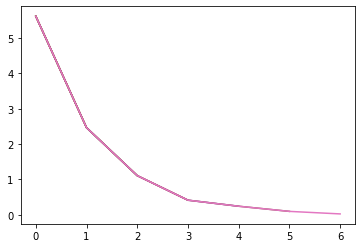

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, len(x)):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 3개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[0.00101667, 0.00503476, 0.00457443, 0.14299998, 0.35488231,
        0.36043129, 0.11826896],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.72892869],
       [0.01156466, 0.12808679, 0.2358111 , 0.38616546, 0.3277066 ,
        0.0054592 , 0.85107039]])

In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['Cluster']
predict

,Cluster
0,0
1,0
2,0
3,2
4,2
5,1
6,2
7,2


In [ ]:
cols = group.columns[1:]
scaled = pd.DataFrame(data=scaled, columns=cols)
scaled

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.000000,0.000000,0.000000,0.245964,0.527847,1.000000,0.233185
1,0.000000,0.003836,0.002954,0.000000,0.000000,0.002346,0.000000
2,0.003050,0.011268,0.010769,0.183036,0.536800,0.078948,0.121622
3,0.003457,0.163270,0.309503,0.619028,0.544919,0.005442,0.833188
4,0.019825,0.125629,0.219578,0.255214,0.231218,0.000964,0.750777
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.728929
6,0.008642,0.186766,0.336797,0.384758,0.333971,0.000818,0.820317
7,0.014335,0.036682,0.077366,0.285662,0.200719,0.014613,1.000000


In [ ]:
names = pd.DataFrame(group['업종소분류'])
names

,업종소분류
0,교육단체
1,문화센터
2,학습지
3,학원-기타
4,학원-어학
5,학원-예체능
6,학원-입시/보습
7,학원-직업


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류
0,0.000000,0.000000,0.000000,0.245964,0.527847,1.000000,0.233185,교육단체
1,0.000000,0.003836,0.002954,0.000000,0.000000,0.002346,0.000000,문화센터
2,0.003050,0.011268,0.010769,0.183036,0.536800,0.078948,0.121622,학습지
3,0.003457,0.163270,0.309503,0.619028,0.544919,0.005442,0.833188,학원-기타
4,0.019825,0.125629,0.219578,0.255214,0.231218,0.000964,0.750777,학원-어학
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.728929,학원-예체능
6,0.008642,0.186766,0.336797,0.384758,0.333971,0.000818,0.820317,학원-입시/보습
7,0.014335,0.036682,0.077366,0.285662,0.200719,0.014613,1.000000,학원-직업


In [ ]:
# predict와 결합
result = pd.concat([result, predict], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,Cluster
0,0.000000,0.000000,0.000000,0.245964,0.527847,1.000000,0.233185,교육단체,0
1,0.000000,0.003836,0.002954,0.000000,0.000000,0.002346,0.000000,문화센터,0
2,0.003050,0.011268,0.010769,0.183036,0.536800,0.078948,0.121622,학습지,0
3,0.003457,0.163270,0.309503,0.619028,0.544919,0.005442,0.833188,학원-기타,2
4,0.019825,0.125629,0.219578,0.255214,0.231218,0.000964,0.750777,학원-어학,2
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.728929,학원-예체능,1
6,0.008642,0.186766,0.336797,0.384758,0.333971,0.000818,0.820317,학원-입시/보습,2
7,0.014335,0.036682,0.077366,0.285662,0.200719,0.014613,1.000000,학원-직업,2


In [ ]:
cluster = pd.DataFrame(km.cluster_centers_)
cluster.columns = cols
cluster.sort_values(by='카드매출금액', inplace=True)
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.001017,0.005035,0.004574,0.143000,0.354882,0.360431,0.118269
2,0.011565,0.128087,0.235811,0.386165,0.327707,0.005459,0.851070
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.728929


In [ ]:
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,Cluster
0,0.000000,0.000000,0.000000,0.245964,0.527847,1.000000,0.233185,교육단체,0
1,0.000000,0.003836,0.002954,0.000000,0.000000,0.002346,0.000000,문화센터,0
2,0.003050,0.011268,0.010769,0.183036,0.536800,0.078948,0.121622,학습지,0
3,0.003457,0.163270,0.309503,0.619028,0.544919,0.005442,0.833188,학원-기타,2
4,0.019825,0.125629,0.219578,0.255214,0.231218,0.000964,0.750777,학원-어학,2
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.728929,학원-예체능,1
6,0.008642,0.186766,0.336797,0.384758,0.333971,0.000818,0.820317,학원-입시/보습,2
7,0.014335,0.036682,0.077366,0.285662,0.200719,0.014613,1.000000,학원-직업,2


In [ ]:
names

,업종소분류
0,교육단체
1,문화센터
2,학습지
3,학원-기타
4,학원-어학
5,학원-예체능
6,학원-입시/보습
7,학원-직업


In [ ]:
cluster.values[0]

array([0.00101667, 0.00503476, 0.00457443, 0.14299998, 0.35488231,
       0.36043129, 0.11826896])

In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종소분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Soso',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Sad',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='Good',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['Cluster']),
        visible=True,
      )),
  )
  print(target['Cluster'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
show_cluster(result, '학습지')

2    0
Name: Cluster, dtype: int32
